<a href="https://colab.research.google.com/github/ShimaGhandriz/Alzheimer-Classification/blob/main/Alzheimer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import The Libraries

import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

from glob import glob

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"shimaqandriz","key":"d95e4bee5b2fe07d3fed0f312d018e72"}'}

In [ ]:
import zipfile
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images

alzheimers-dataset-4-class-of-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/diabetic-retinopathy-224x224-2019-data.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory // mode read r/ w a
   zipObj.extractall()

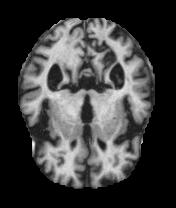

In [ ]:
img = Image.open("/content/Alzheimer_s Dataset/train/ModerateDemented/moderateDem0.jpg")
img.show()

In [ ]:
# make new directory
!mkdir Alzheimer_dataset_3class
!mkdir Alzheimer_dataset_3class/train
!mkdir Alzheimer_dataset_3class/test

In [ ]:
# copy a file
!cp '/content/kaggle.json' '/content/Alzheimer_dataset_3class/train'

In [ ]:
######################################### starts here

# delete one class in train dataset file
!rm '/content/Alzheimer_s Dataset/train/ModerateDemented'/*.jpg
!rmdir '/content/Alzheimer_s Dataset/train/ModerateDemented'

In [ ]:
# delete one class in test dataset file
!rm '/content/Alzheimer_s Dataset/test/ModerateDemented'/*.jpg
!rmdir '/content/Alzheimer_s Dataset/test/ModerateDemented'

In [ ]:
# load the Train dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = '/content/Alzheimer_s Dataset/train',
     labels = "inferred",
     class_names=['MildDemented', 'NonDemented', 'VeryMildDemented'],
     batch_size = 32 ,
     image_size = (224, 224) ,
     label_mode = 'categorical'

)

Found 5069 files belonging to 3 classes.


In [ ]:
#load the Test dataset

test_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    directory = '/content/Alzheimer_s Dataset/test',
     labels = "inferred",
     batch_size = 32 ,
     image_size = (224, 224),
     label_mode = 'categorical'
)

Found 1267 files belonging to 3 classes.


In [ ]:
import tensorflow_datasets as tfds

tfds.as_numpy(train_ds)


In [ ]:
print(type(train_ds))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [ ]:
labels = []
images = []
for i, l in train_ds:
  labels.append(l)
  images.append(i)

print(len(labels))
print(len(images))

NameError: ignored

In [ ]:
images_data = np.concatenate(images)
labels_data = np.concatenate(labels)

In [ ]:
print(images_data.shape)
print(labels_data.shape)

(5069, 224, 224, 3)
(5069, 3)


In [ ]:
train_np = np.stack(list(train_ds))
test_np = np.stack(list(test_ds))
print(type(train_np), train_np.shape)
print(type(test_np), test_np.shape)

/usr/local/lib/python3.9/dist-packages/numpy/core/shape_base.py:420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arrays = [asanyarray(arr) for arr in arrays]


ValueError: ignored

In [ ]:
# LOAD THE DATASET AGAIN

train_datagen = ImageDataGenerator(rotation_range=90)
train_generator = train_datagen.flow_from_directory(
    directory=r"/content/Alzheimer_s Dataset/train",
    target_size=(224, 224),
    #color_mode="rgb",
    batch_size=None,
    class_mode="categorical",
    shuffle=True,
    #seed=42
)

test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    directory=r"/content/Alzheimer_s Dataset/test",
    target_size=(224, 224),
    #color_mode="rgb",
    batch_size=None,
    class_mode="categorical",
    shuffle=False,
    #seed=42
)


Found 5069 images belonging to 3 classes.
Found 1267 images belonging to 3 classes.


In [ ]:
for images, labels in train_ds.take(158):
  images_train = images

In [ ]:
print(len(images_train))

1


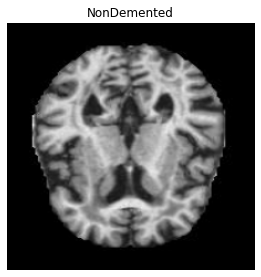

In [ ]:
# plotting some of the dataset

class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    ax = plt.subplot(2, 2, 3)
    plt.imshow(images[1].numpy().astype("uint8"))
    plt.title(class_names[np.where(labels[1].numpy()==1)[0].tolist()[0]])
    plt.axis("off")

In [ ]:
# data augmentation 1

datagen = ImageDataGenerator(rotation_range=90)

datagen.fit(train_ds)
#datagen.flow(train_ds, shuffle=False)

TypeError: ignored

In [ ]:

print(class_names)

In [ ]:
images, labels= train_ds
print(images.shape)

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.where(labels[i].numpy()==1)[0].tolist()[0]])
    plt.axis("off")


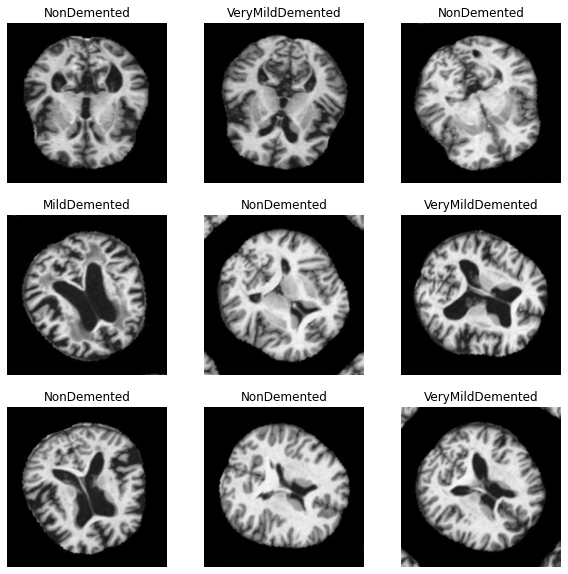

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in aug_rot.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.where(labels[i].numpy()==1)[0].tolist()[0]])
    plt.axis("off")


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
print(train_ds)

(32, 224, 224, 3)
(32, 3)
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [ ]:
# data augmentarion 2
ds_flip = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical")
])
ds_rot = tf.keras.Sequential([
  layers.RandomRotation(0.2),
])
ds_zoom = tf.keras.Sequential([
  layers.RandomZoom(0.5, 0.2)
])

## applying to dataset
aug_flip = train_ds.map(
  lambda x, y: (ds_flip(x, training=True), y))
aug_rot = train_ds.map(
  lambda x, y: (ds_rot(x, training=True), y))
aug_zoom = train_ds.map(
  lambda x, y: (ds_zoom(x, training=True), y))


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
new_ds = train_ds.concatenate(aug_rot)

In [ ]:
newer_ds = new_ds.concatenate(aug_flip.concatenate(aug_zoom))

In [ ]:
newer_ds.cardinality().numpy()

636

In [ ]:
image = tf.cast(tf.expand_dims(images, 0), tf.float32) ##### ???????????????????

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image_batch)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")


In [ ]:
resnet = ResNet50(
    weights = 'imagenet', # Default weights.
    include_top = False,   # ,
     pooling='max'
)
print(len(resnet.layers))
for layer in resnet.layers[:174]:
    layer.trainable = False

94765736/94765736 [==============================] - 0s 0us/step
176


In [ ]:
base_model = Sequential([data_augmentation]) # Applying augmentation to the model ???
# base_model = Sequential()
base_model.add(resnet)

base_model.add(Dense(512, activation='relu'))
#base_model.add(Dropout(0.1))
base_model.add(Dense(256, activation='relu'))
base_model.add(Dense(3, activation='softmax'))

In [ ]:
base_model.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics = ['acc'])


In [ ]:
base_model.build((None, 224,224,3)) # `input_shape` is the shape of the input data
base_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
Total params: 24,768,899
Trainable params: 1,181,187
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet_history = base_model.fit(train_ds,
                                validation_data = test_ds ,
                                steps_per_epoch = len(train_ds),
                                epochs = 10)

Epoch 1/10


159/159 [==============================] - 50s 225ms/step - loss: 1.9612 - acc: 0.4768 - val_loss: 1.2985 - val_acc: 0.5201
Epoch 2/10
159/159 [==============================] - 35s 222ms/step - loss: 0.9605 - acc: 0.5435 - val_loss: 0.9470 - val_acc: 0.5580
Epoch 3/10
159/159 [==============================] - 34s 213ms/step - loss: 0.8840 - acc: 0.5715 - val_loss: 1.2097 - val_acc: 0.3686
Epoch 4/10
159/159 [==============================] - 34s 213ms/step - loss: 0.9242 - acc: 0.5476 - val_loss: 0.9184 - val_acc: 0.5643
Epoch 5/10
159/159 [==============================] - 34s 213ms/step - loss: 0.8659 - acc: 0.5733 - val_loss: 0.9361 - val_acc: 0.5683
Epoch 6/10
159/159 [==============================] - 33s 208ms/step - loss: 0.8477 - acc: 0.5883 - val_loss: 0.9025 - val_acc: 0.5888
Epoch 7/10
159/159 [==============================] - 34s 210ms/step - loss: 0.8448 - acc: 0.5859 - val_loss: 0.8845 - val_acc: 0.5691
Epoch 8/10
159/159 [==============================] - 34s 213ms/st

In [ ]:
import numpy as np

In [ ]:
np.random.seed(42)
np.random.rand(1)

array([0.37454012])

In [ ]:
np.random.seed(42)
np.random.rand(1)

array([0.37454012])